# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 3: Planetary Motions
## 03.03.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
from matplotlib.animation import FuncAnimation
import time
import imageio
import os, shutil
from matplotlib.patches import Circle

In [2]:
sns.set_style(style='whitegrid')

In [36]:
# Aphelion distance in AU
r_ap = 1
# Eccentricity
eccentricity = 0.5
# Number of periods
periods = 100
# Step size
dt = 1
# Adaptive accuracy of simulation
accuracy = 1e-06

steps = 1

In [37]:
def mode_choose():
    
    current_mode = ('..\Release\kepler.exe ' +
                    str(r_ap) + ' ' +
                    str(eccentricity) + ' ' +
                    str(periods) + ' ' +
                    str(dt) + ' ' +
                    str(accuracy)
                )

    return(current_mode)

In [38]:
current_mode = mode_choose()
os.system(current_mode)
data_fix = np.genfromtxt('fixed.dat')
data_adaptive = np.genfromtxt('adaptive.dat')

## First plotting

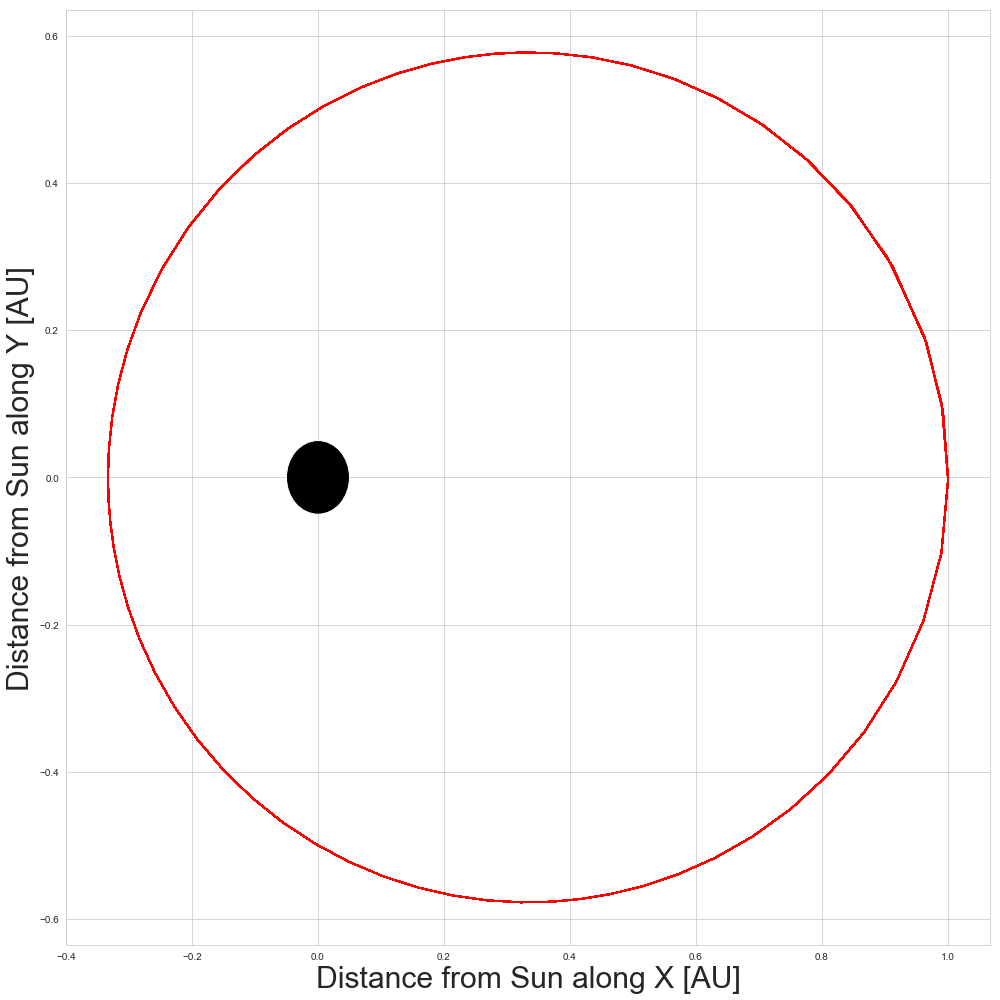

In [39]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*14))

axes.plot(data_adaptive[::steps,1], data_adaptive[::steps,2], c='red')

axes.set_xlabel('Distance from Sun along X [AU]', fontsize=30)
axes.set_ylabel('Distance from Sun along Y [AU]', fontsize=30)

Sun = Circle((0, 0), 0.05, fc='k', zorder=10)
axes.add_patch(Sun)

fig.tight_layout()
plt.show()